## Stream functions for flow past objects

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [25]:

def psi_c_general(x , y , func ):
    """
    Converts Cartesian x and y to polar coords, and calls func
    """
    r = np.sqrt(x**2+y**2)
    th= np.arctan2(y,x)  #  np.arctan(y/x)# 
    return func(r,th)


### Potential flow past cylinder

In [3]:
def psi(r,th):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return np.where( r <= 1.0 , 0 , (r-1/r)*np.sin(th) )  



In [4]:
deltar=0.1
deltat=0.1
th = np.arange(0,2*np.pi, deltat )
r  = np.arange(1.0, 2.0, deltar)
R, T = np.meshgrid(r, th)

In [5]:
Z = psi(R  ,  T  )

Text(0.5,1.05,'Streamlines, does not really work')

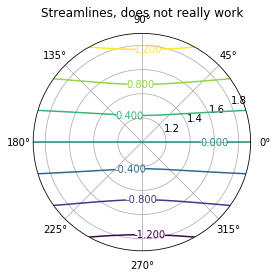

In [6]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
CS = ax.contour(T, R, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Streamlines, does not really work')

In [7]:
X= R*np.cos(T)
Y= R*np.sin(T)


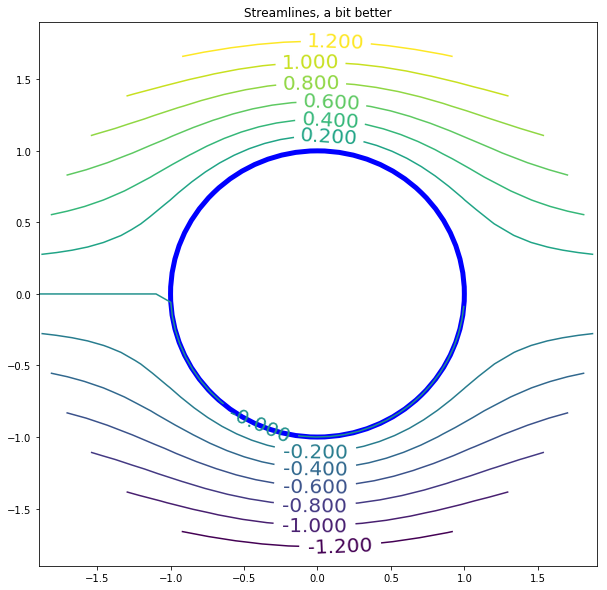

In [11]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Z, levels= np.arange(-2, 2, 0.2) )
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines, a bit better')
#ax.set_ylim(0 ,2)
ax.add_artist(circle)

In [12]:
deltax=0.01
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = psi_c_general ( X  ,  Y , psi )

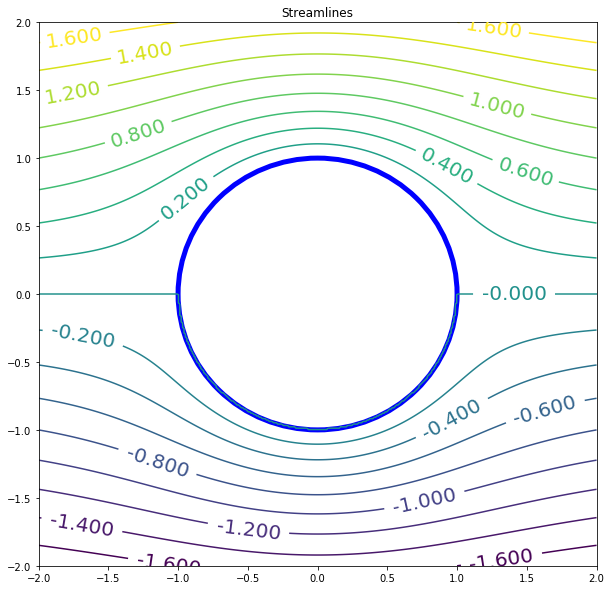

In [14]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax2 = plt.subplots(figsize=(1*height, height) )
CS2 = ax2.contour(X, Y, Zc, levels= np.arange(-2, 2, 0.2) ) 
ax2.clabel(CS2, inline=1, fontsize=20)
ax2.set_title('Streamlines')
#ax2.set_ylim(0 ,lim)
#ax.set_aspect( 1 )
ax2.add_artist(circle)

In [22]:
fig.savefig('potential_flow_past_cylinder.eps')

### Potential flow past cylinder, moving with the fluid

In [26]:

def psi_moving(r,th):
   return np.where( r < 1.0 , 0 , (-1/r)*np.sin(th) )  


In [27]:
deltax=0.01
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zm = -1*psi_c_general( X  ,  Y ,psi_moving )

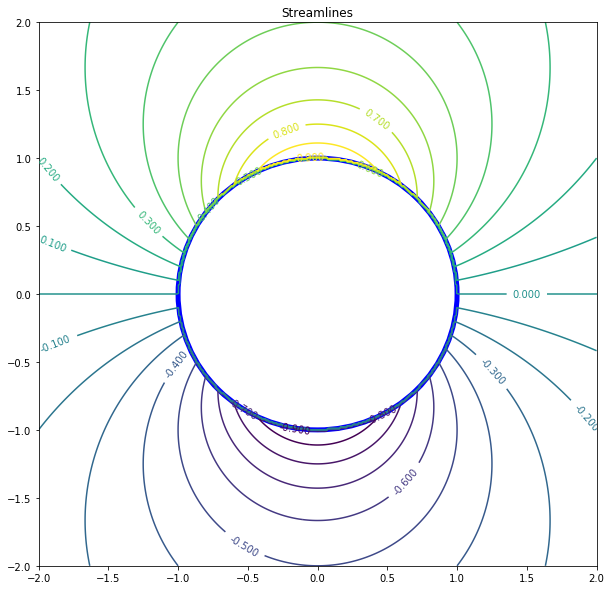

In [29]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Zm , levels= np.arange(-2, 2, 0.1) ) 
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
ax.add_artist(circle)
#ax.set_aspect( 1 )

In [30]:
fig.savefig('potential_flow_past_cylinder_moving.eps')

### potential flow past a cylinder + circulation + moving frame

In [35]:
def psi_rot(r,th):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return np.where( r <= 1.0 , 0 , (-1/r )*np.sin(th) + 10*np.log(r)/(2*np.pi) )  



In [36]:
deltax=0.01
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zm = -1*psi_c_general( X  ,  Y ,psi_rot )

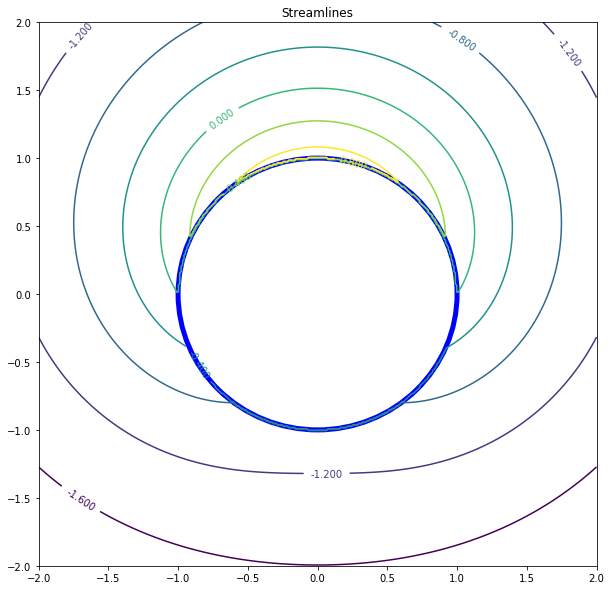

In [37]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(height, height) )
CS = ax.contour(X, Y, Zm) # , levels= np.arange(0.1, 2, 0.1) ) 
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
ax.add_artist(circle)
#ax.set_aspect( 1 )

In [38]:
fig.savefig('potential_flow_past_cylinder_rotating_moving.eps')

### potential flow past a cylinder + circulation

In [39]:
def psi_rot(r,th):
#    f = np.zeros((len(r),len(th)))
#    f[ r > 1 ] = (r-1/r)*np.sin(th)
    return np.where( r <= 1.0 , 0 , (r-1/r )*np.sin(th) + 10*np.log(r)/(2*np.pi) )  



In [40]:
deltax=0.01
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zm = -1*psi_c_general( X  ,  Y ,psi_rot )

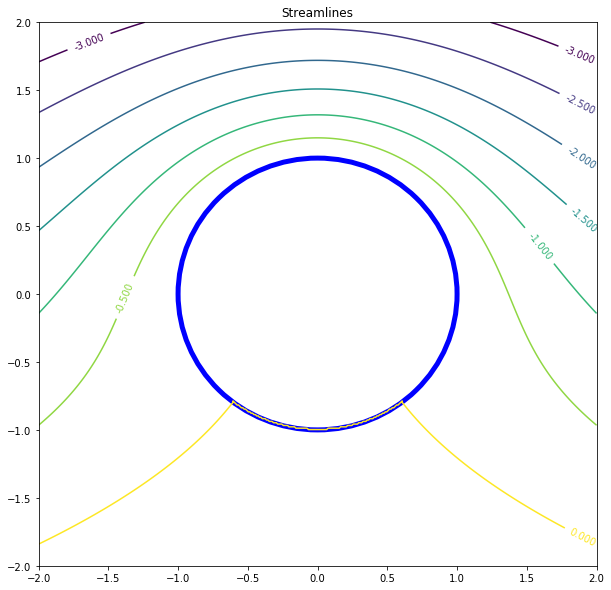

In [41]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(height, height) )
CS = ax.contour(X, Y, Zm) # , levels= np.arange(0.1, 2, 0.1) ) 
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
ax.add_artist(circle)
#ax.set_aspect( 1 )

In [42]:
fig.savefig('potential_flow_past_cylinder_rotating.eps')

### Potential flow past shere

In [43]:

def psi_sp(r,th):
    return np.where( r < 1.0 , 0 , r**2 * ( 1 - 1/r**3 )*np.sin(th)**2 / 2 )

def psi_sp_moving(r,th):
    return np.where( r < 1.0 , 0 , (  - 1/r)*np.sin(th)**2 / 2 )


In [44]:
deltax=0.02
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = 1*psi_c_general ( X  ,  Y , psi_sp  )

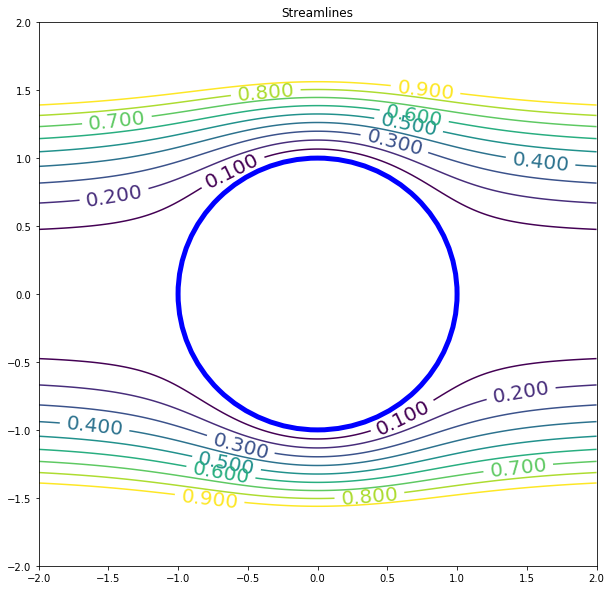

In [48]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Zc , levels= np.arange(-1, 1, 0.1) ) 
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
#ax.set_aspect( 1 )
ax.add_artist(circle)

In [49]:
fig.savefig('potential_flow_past_sphere.eps')

In [50]:
deltax=0.02
lim = 2
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = 1*psi_c_general ( X  ,  Y , psi_sp_moving  )

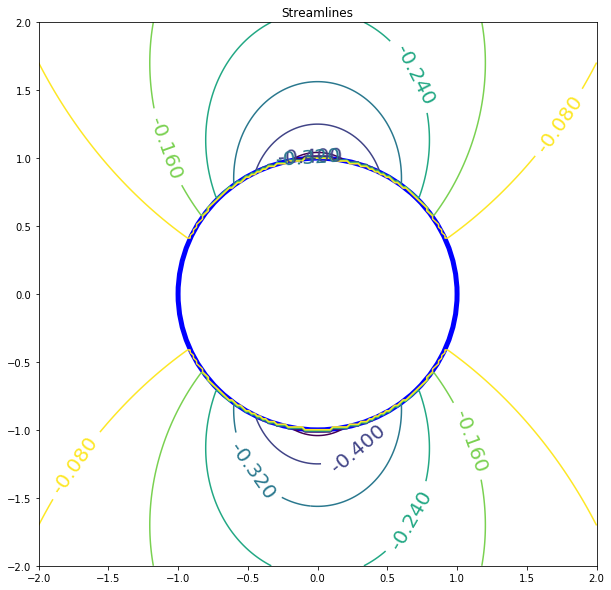

In [52]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Zc) # , levels= np.arange(0, 10, 0.2) ) 
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
#ax.set_aspect( 1 )
ax.add_artist(circle)

In [53]:
fig.savefig('potential_flow_past_sphere_moving.eps')

### Creeping flow past shere

In [54]:

def psi_sp_creep(r,th):
    return np.where( r < 1.0 , 0 , ( 2*r**2 - 3*r + 1/r)*np.sin(th)**2 )

def psi_sp_creep_moving(r,th):
    return np.where( r < 1.0 , 0 , (  - 3*r + 1/r)*np.sin(th)**2 )



In [70]:
deltax=0.02
lim = 5
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = 1*psi_c_general ( X  ,  Y , psi_sp_creep  )

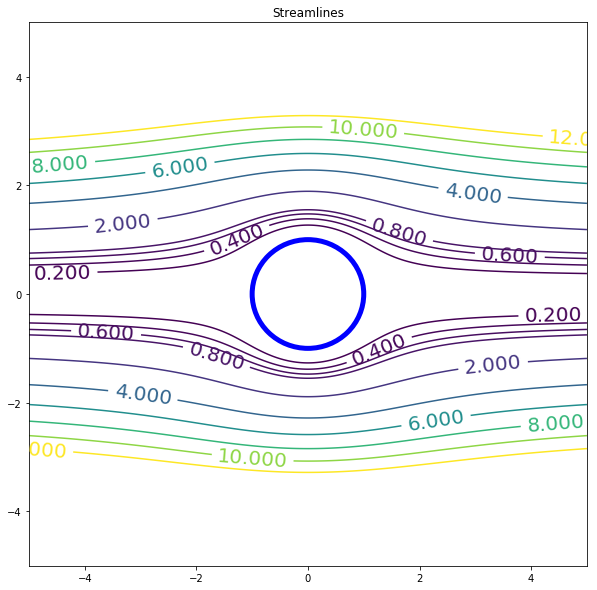

In [99]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
r1=np.arange(-14,14, 2 ) ; r2=  np.arange(-1,1,0.2) ;rr=np.concatenate( [ r1 , r2 ] ); rr.sort() 
CS = ax.contour(X, Y, Zc , levels= rr ) 
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
#ax.set_aspect( 1 )
ax.add_artist(circle)

In [100]:
fig.savefig('creeping_flow_past_sphere.eps')

In [101]:
deltax=0.02
lim = 5
nn = int(2*lim/deltax)
x = np.linspace( -lim , lim , nn )
y = np.linspace( -lim , lim , nn )
X, Y = np.meshgrid(x, y)
Zc = 1*psi_c_general ( X  ,  Y , psi_sp_creep_moving  )

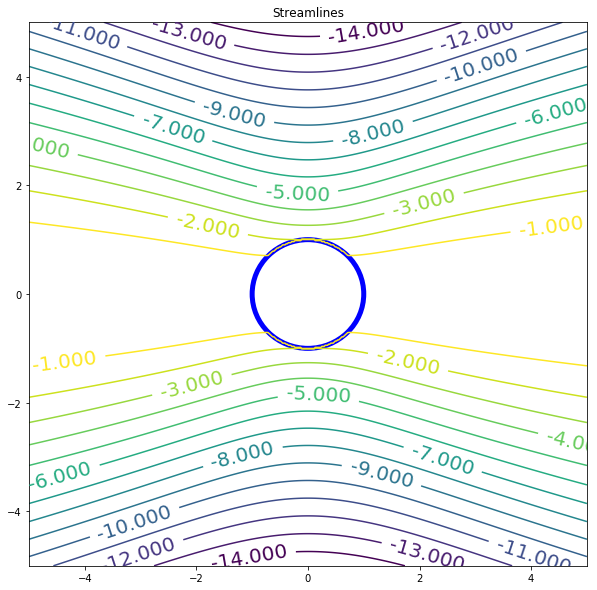

In [102]:
circle = plt.Circle((0 , 0 ), 1 , color='blue',fill=False,lw=5)
height=10
fig, ax = plt.subplots(figsize=(1*height, height) )
CS = ax.contour(X, Y, Zc , levels= np.arange(-14, 14, 1) ) 
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title('Streamlines')
#ax.set_ylim(0,lim )
ax.add_artist(circle)


In [103]:
fig.savefig('creeping_flow_past_sphere_moving.eps')